# Bioimage Analysis in Jupyter Notebooks

In this notebook, we will load an image stored in the file `data/lund.tif`, visualize it, process it using [pyclesperanto]() for segmentation, and finally visualize the segmentation results.

We will use these libraries
* [scikit-image](https://scikit-image.org/)
* [numpy](https://numpy.org/)
* [pyclesperanto](https://github.com/clesperanto/pyclesperanto)
* [stackview](https://github.com/haesleinhuepf/stackview)

We typically import all libraries we need at the beginning of a notebook to check if everything is installed.

In [1]:
from skimage.io import imread, imsave
import stackview
import pyclesperanto as cle
import numpy as np

## Loading an image

In this step, we will load the image file named `lund.tif` using the `imread` function from the `skimage.io` module. This function reads the image data into a NumPy array which can then be processed or visualized in the subsequent steps. For example, we can print out the size (in pixels or voxels) of the image.

In [2]:
image = imread('data/lund.tif')

image.shape

(100, 256, 256)

## Visualization
There are plenty of options and libraries for visualizing images. Here we will use [stackview](https://github.com/haesleinhuepf/stackview), a library specifically developed for working interactively with image stacks in Juypter notebooks. 

`stackview.insight` will do a projection of our 3D image and visualize it next to some descriptive statistics of the image stack.

[[[144 142 145 ... 140 138 137]
  [145 142 143 ... 141 139 138]
  [142 139 141 ... 140 139 142]
  ...
  [256 252 260 ... 308 287 273]
  [253 249 253 ... 319 298 278]
  [256 255 253 ... 322 296 273]]

 [[143 140 145 ... 139 139 137]
  [145 139 144 ... 140 140 138]
  [143 140 142 ... 141 140 141]
  ...
  [255 255 263 ... 314 292 274]
  [255 250 251 ... 328 302 277]
  [257 253 250 ... 329 298 272]]

 [[143 139 145 ... 139 139 137]
  [145 138 145 ... 139 141 137]
  [143 140 142 ... 142 141 141]
  ...
  [254 257 265 ... 316 293 272]
  [255 251 250 ... 330 302 274]
  [257 251 248 ... 332 298 270]]

 ...

 [[137 138 140 ... 128 127 129]
  [140 140 137 ... 131 127 129]
  [140 138 138 ... 129 130 133]
  ...
  [177 182 181 ... 160 161 161]
  [179 185 186 ... 162 157 158]
  [181 179 184 ... 158 157 160]]

 [[136 138 141 ... 127 127 129]
  [139 139 136 ... 131 127 129]
  [140 137 138 ... 127 128 134]
  ...
  [175 179 179 ... 158 159 159]
  [177 182 184 ... 162 155 158]
  [180 174 180 ... 158 157 158]]

 [[136 136 139 ... 129 129 129]
  [137 137 135 ... 130 128 128]
  [138 135 136 ... 128 130 132]
  ...
  [174 176 177 ... 159 157 157]
  [179 180 180 ... 160 154 156]
  [178 174 177 ... 158 156 157]]]
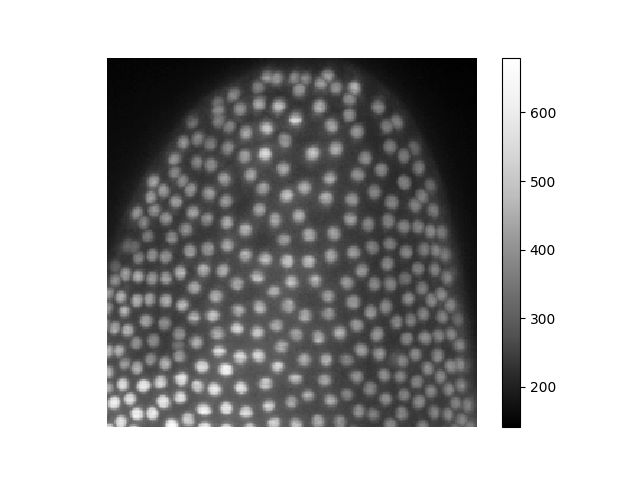
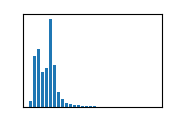

In [3]:
stackview.insight(image)

We will use `stackview.animate` to display the loaded image slice-by-slice. This method animates through the z-stack slices, allowing us to visually inspect the image frame by frame. For performance reasons, we only display every 4th slice.

C:\Users\rober\miniforge3\envs\embo25\Lib\site-packages\stackview\_animate.py:43: UserWarning: The timelapse has an intensity range exceeding 0..255. Consider normalizing it to the range between 0 and 255.
  warnings.warn("The timelapse has an intensity range exceeding 0..255. Consider normalizing it to the range between 0 and 255.")



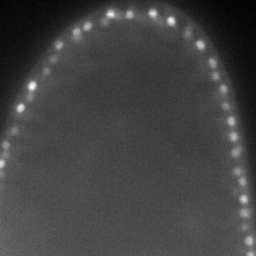

In [4]:
# Visualize the image as animation
stackview.animate(image[::4])

While the view above renders in the browser in teaching materials, the next will not. The following interactive tool needs to be executed on your computer to see something. We will use `stackview.slice` to navigate through the image stack one slice at a time and change the slice-position manually.

In [5]:
# Visualize the image as a slice
stackview.slice(image)

## Image processing

For demonstration purposes, we will segment this image. For learning more about image pre-processing, segmentation, post-processing and feature extraction, please refer to the [BioImageAnalysisNotebooks](). 
We will use the [pyclesperanto]() library, a GPU-accelerated Python library to speed-up processing of 3D data.
First, we apply the `top_hat_box` filter, which helps to enhance the image by removing uneven background intensity.


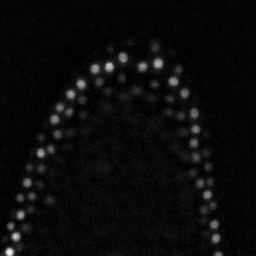

In [6]:
# Apply top hat filter to the image
processed_image = np.asarray(cle.top_hat_box(image, radius_x=10, radius_y=10, radius_z=0))

stackview.animate_curtain(image[50], processed_image[50])

## Image Segmentation
This step involves segmenting the processed image using the `voronoi_otsu_labeling` function from `pyclesperanto`. This segmentation technique combines Voronoi tessellation and Otsu's method to effectively separate foreground objects from the background in a semi-automated manner, resulting in a labeled image with distinct segments for each object.

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 16, 16, 16],
        [ 0,  0,  0, ..., 16, 16, 16],
        [ 0,  0,  0, ..., 16, 16, 16]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 16, 16, 16],
        [ 0,  0,  0, ..., 16, 16, 16],
        [ 0,  0,  0, ..., 16, 16, 16]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 16, 16, 16],
        [ 0,  0,  0, ..., 16, 16, 16],
        [ 0,  0,  0, ..., 16, 16, 16]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]]], dtype=uint32, mtype=buffer)
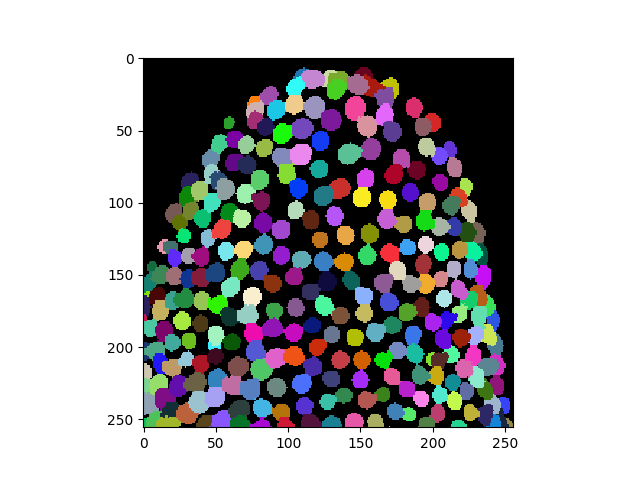

In [7]:
# Segment the image using voronoi otsu labeling
label_image = cle.voronoi_otsu_labeling(processed_image, spot_sigma=2, outline_sigma=2)
label_image

We can also view this label image over the background-subtracted image using a curtain.


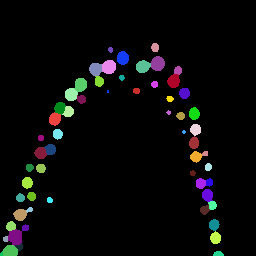

In [8]:
stackview.animate_curtain(processed_image[50], label_image[50])

We can determine the maximum number of objects by taking the maximum intensity in the label image, because the labels are numbered subsequently from 1-n.

In [9]:
label_image.max()

285.0

## Interactive browsing the resulut
We can use `stackview.curtain` the original image side-by-side with the segmented labels. This interactive visualization allows for comparing the original structures with their respective segmentation directly by dragging a curtain across the images.

In [10]:
# Visualize the original image and its label image using curtain
stackview.curtain(image, label_image)

## Saving results
Finally, we save the resulting label image to disk. Note: When using segmented images, use file-formats such as .tif which can easily be opened again in other software and preserved the full information in the image. Avoid .png and .jpg for saving scientific data.

In [11]:
imsave("data/Lund_labels.tif", label_image)

C:\Users\rober\miniforge3\envs\embo25\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: data/Lund_labels.tif is a low contrast image
  return func(*args, **kwargs)
